In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sentinels = {'PRECIP': ['Nulo'], 'EVAP': ['Nulo'], 'TMAX': ['Nulo'],'TMIN': ['Nulo']}
datos_df = pd.read_csv("unison.txt",skiprows=0, sep='\s+',na_values=sentinels)
df = pd.DataFrame(datos_df)
df.head(10)

,FECHA,PRECIP,EVAP,TMAX,TMIN
0,14/10/1981,0.0,NaN,28.0,NaN
1,15/10/1981,0.0,7.3,26.0,14.0
2,16/10/1981,0.0,7.6,28.0,12.5
3,17/10/1981,0.0,8.1,28.0,10.0
4,18/10/1981,0.0,1.2,30.5,9.5
5,19/10/1981,0.0,4.2,32.0,12.5
6,20/10/1981,0.5,6.7,32.0,14.5
7,21/10/1981,0.0,8.2,31.0,18.0
8,22/10/1981,0.0,6.9,32.0,15.0
9,23/10/1981,0.0,2.7,35.5,14.5


In [12]:
#Se elimina la columna 'FECHA' y se crean otras dos para AÑO y MES
df['FECHAN'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df = df.drop(['FECHA'], 1)

df['MES'] = df['FECHAN'].dt.month
df['AÑO'] = df['FECHAN'].dt.year

In [13]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN,MES,AÑO
count,5182.000000,3104.000000,4974.000000,4959.000000,5444.000000,5444.000000
mean,0.972096,6.432571,32.110032,13.363783,6.443424,1989.487693
std,5.666403,3.219988,6.949653,7.035267,3.491508,4.839784
min,0.000000,0.100000,0.000000,-3.500000,1.000000,1981.000000
25%,0.000000,3.800000,26.625000,7.500000,3.000000,1985.000000
50%,0.000000,6.100000,33.000000,12.000000,6.000000,1990.000000
75%,0.000000,8.800000,37.500000,19.500000,9.000000,1994.000000
max,119.300000,16.500000,49.000000,29.000000,12.000000,1998.000000


In [14]:
#Almacenando el mes en cada variable
df_ENE=df[df.MES==1]
df_FEB=df[df.MES==2]
df_MAR=df[df.MES==3]
df_ABR=df[df.MES==4]
df_MAY=df[df.MES==5]
df_JUN=df[df.MES==6]
df_JUL=df[df.MES==7]
df_AGO=df[df.MES==8]
df_SEP=df[df.MES==9]
df_OCT=df[df.MES==10]
df_NOV=df[df.MES==11]
df_DIC=df[df.MES==12]

In [73]:
#Calculando el numero de años de datos
num_años = len(df['AÑO'].unique())
print(num_años, "años de datos")

18 años de datos


In [ ]:
heladas = df['TMIN'] < 0
len(heladas)

In [ ]:
heladas

In [ ]:
len(heladas==TRUE)

In [ ]:
len(heladas==True)

In [ ]:
FD=heladas

In [ ]:
len(FD)

In [ ]:
FD=FD.count(True)

In [ ]:
sum(FD)

In [16]:
FD=pd.DataFrame( df.loc[df['TMIN']<0] )
FD.groupby('AÑO').count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x000001AEFF66CC18>>

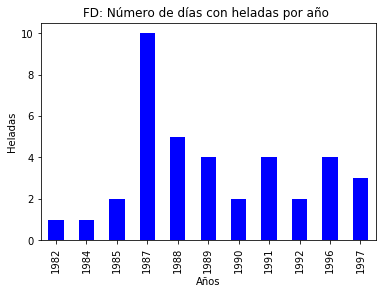

In [75]:
#Número de heladas por año
FD=pd.DataFrame( df.loc[df['TMIN']<0] )
FD.groupby('AÑO').count()

FD=pd.DataFrame( FD.groupby('AÑO').count() )

FD_df = FD.filter(['TMIN'],axis=1)
FD_df['HELADAS'] = FD_df['TMIN']
FD_df = FD_df.drop(['TMIN'],1)

FD_df= FD_df.reset_index()
FD_df.head()

#1er Gráfica: FD
FD_df.plot.bar(x='AÑO', y='HELADAS', legend=False, color='b')
plt.title("FD: Número de días con heladas por año ")
plt.ylabel("Heladas") 
plt.xlabel("Años",)
plt.savefig('FD')

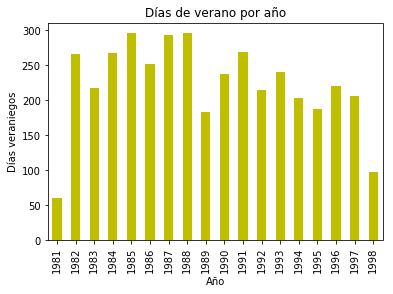

In [77]:
#Número de días de verano por año
SU=pd.DataFrame( df.loc[df['TMAX']>25  ] )
SU=pd.DataFrame( SU.groupby('AÑO').count() )

#Número de valores
SU_df = SU.filter(['TMAX'],axis=1)
SU_df['dias_ver'] = SU_df['TMAX']
SU_df = SU_df.drop(['TMAX'],1)
SU_df = SU_df.reset_index()

#2da Gráfica: SU
SU_df.plot.bar(x='AÑO',y='dias_ver',color='y',legend=None)
plt.title("Días de verano por año")
plt.ylabel("Días veraniegos")
plt.xlabel("Año")
plt.savefig('SU',plt=2000)

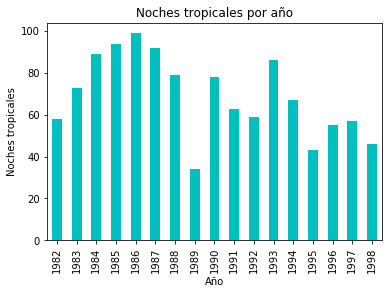

In [79]:
#TR: Número de noches tropicales por año (Tmin > 20ºC)
TR=pd.DataFrame( df.loc[df['TMIN'] > 20 ] )
TR=pd.DataFrame( TR.groupby('AÑO').count() )

#Número de valores
TR_df = TR.filter(['TMIN'],axis=1)
TR_df['dias_trop'] = TR_df['TMIN']
TR_df = TR_df.drop(['TMIN'],1)

TR_df = TR_df.reset_index()

#3era Gráfica: TR
TR_df.plot.bar(x='AÑO',y='dias_trop',color='c',legend=None)
plt.title("Noches tropicales por año")
plt.ylabel("Noches tropicales")
plt.xlabel("Año")
plt.savefig('TR',plt=2000)

In [20]:
#Calculando y creando una columna para la temperatura promedio
df['TPROM'] = (df.TMAX + df.TMIN)/2
df

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO,TPROM
0,0.0,NaN,28.0,NaN,1981-10-14,10,1981,NaN
1,0.0,7.3,26.0,14.0,1981-10-15,10,1981,20.00
2,0.0,7.6,28.0,12.5,1981-10-16,10,1981,20.25
3,0.0,8.1,28.0,10.0,1981-10-17,10,1981,19.00
4,0.0,1.2,30.5,9.5,1981-10-18,10,1981,20.00
5,0.0,4.2,32.0,12.5,1981-10-19,10,1981,22.25
6,0.5,6.7,32.0,14.5,1981-10-20,10,1981,23.25
7,0.0,8.2,31.0,18.0,1981-10-21,10,1981,24.50
8,0.0,6.9,32.0,15.0,1981-10-22,10,1981,23.50
9,0.0,2.7,35.5,14.5,1981-10-23,10,1981,25.00


In [53]:
#Contador para los días que cumplan que la temperatura promedio es mayor a 5 C, y para los primeros seis días consecutivos que cumplen la misma condición.
p_dias = []
p_seis=-1

for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(5,len(df)-1):
        if(df["AÑO"][j-5] == i):
            if(df["TPROM"][j-5] > 5 and df["TPROM"][j-4] > 5 and df["TPROM"][j-3] > 5 and
               df["TPROM"][j-2] > 5 and df["TPROM"][j-1] > 5 and df["TPROM"][j]   > 5):
                    p_seis = j
                    break
    if(p_seis != -1):
        p_dias.append(p_seis)
        p_seis= -1
    else:
        p_dias.append("NA") 

In [54]:
#Realizamos ahora un contador que cuente los dìas donde la temperatura promedio es menor a 5C, así como los primeros seis días
#consecutivos en donde se cumple lo anterior. Llamamos a estos días como los "últimos días" ya que son los últimos días 
#de la Temporada de Cultivo.
u_dias = []
u_seis = -1

for j in range(df["AÑO"][len(df)-1],df["AÑO"][0]-1,-1):
    for i in range(len(df)-1,5,-1):
        if(df["AÑO"][i] == j):
            if(df["TPROM"][i-5] < 5 and df["TPROM"][i-4] < 5 and df["TPROM"][i-3] < 5 and
               df["TPROM"][i-2] < 5 and df["TPROM"][i-1] < 5 and df["TPROM"][i]   < 5):
                    u_seis = i-5
                    break
    if( u_seis != -1 ):
        u_dias.append(u_seis)
        u_seis= -1
    else:
        u_dias.append("NA")

In [23]:
#Se calcula el GSL (Growing Season Large) de nuestra región. 

GSL = []
inicial = df['AÑO'][0]
for i in range(0,len(u_dias)):
    if(u_dias[i]!="NA" and p_dias[i]!="NA"):
        GSL.append( u_dias[i]-p_dias[i] )
    if( u_dias[i]=='NA' ):
            GSL.append( len(df[df['AÑO'] == inicial].index) )
    else:
        if( p_dias[i]=='NA' ):
            GSL.append(0)
    inicial=inicial+1

In [81]:
print(GSL)

[79, 364, 306, 358, 364, 273, 358, 344, 257, 303, 363, 339, 344, 327, 319, 296, 297, 153]


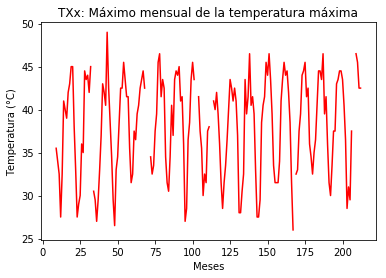

In [86]:
#TXx: Máximo mensual de la Temperatura Máxima
TXx=[]
inicial=df['AÑO'][0]
num_años=df['AÑO'].nunique()

for i in range(0,num_años):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                max_TMAX_mes = df_mes.TMAX.max()
                TXx.append(max_TMAX_mes)    
        inicial=inicial+1
    


#5ta Gráfica: TXx
plt.plot(TXx, label = "Máximo mensual de la temperatura máxima", color = 'r')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
#plt.legend()
plt.title('TXx: Máximo mensual de la temperatura máxima')
plt.savefig('TXx',plt=2000)
plt.show()

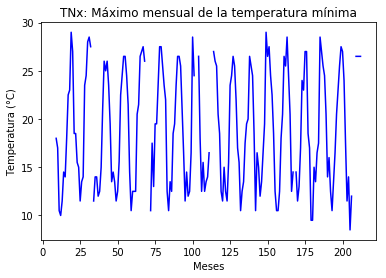

In [89]:
#TNx: Máximo mensual de la Temperatura Mínima 
TNx=[]
inicial=df['AÑO'][0]
num_años=df['AÑO'].nunique()

for i in range(0,num_años):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                max_TMIN_mes = df_mes.TMIN.max()
                TNx.append(max_TMIN_mes)    
        inicial=inicial+1
        
#6ta Gráfica: TNx
plt.plot(TNx, label = "Máximo mensual de la temperatura mínima", color = 'b')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
#plt.legend()
plt.title('TNx: Máximo mensual de la temperatura mínima')
plt.savefig('TNx',plt=2000)
plt.show()

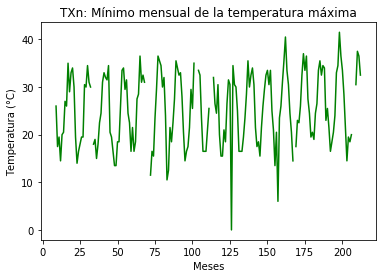

In [88]:
#TXn: Mínimo mensual de la Temperatura Máxima
TXn=[]
inicial=df['AÑO'][0]
num_años=df['AÑO'].nunique()

for i in range(0,num_años):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                min_TMAX_mes = df_mes.TMAX.min()
                TXn.append(min_TMAX_mes)    
        inicial=inicial+1
        
#7ma Gráfica: TXn
plt.plot(TXn, label = "Mínimo mensual de la temperatura máxima", color = 'g')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
#plt.legend()
plt.title('TXn: Mínimo mensual de la temperatura máxima')
plt.savefig('TXn',plt=2000)
plt.show()

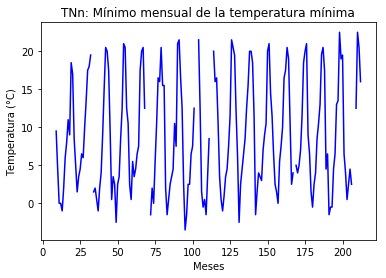

In [93]:
#TNn: Mínimo mensual de la Temperatura Mínima
TNn=[]
inicial=df['AÑO'][0]
num_años=df['AÑO'].nunique()

for i in range(0,num_años):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                min_TMIN_mes = df_mes.TMIN.min()
                TNn.append(min_TMIN_mes)    
        inicial=inicial+1
        
#8va Gráfica: TNn
plt.plot(TNn, label = "Mínimo mensual de la temperatura mínima", color = 'b')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
#plt.legend()
plt.title('TNn: Mínimo mensual de la temperatura mínima')
plt.savefig('TNn',plt=2000)
plt.show()

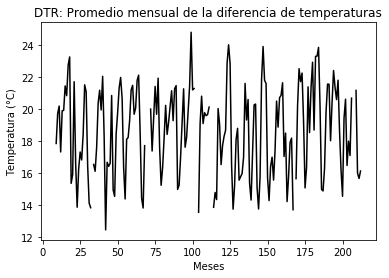

In [94]:
#DTR: El promedio mensual de la diferencia de temperaturas (Tmax-Tmin)
df['dif_T']=(df.TMAX-df.TMIN)

DTR=[]
inicial=df['AÑO'][0]
num_años=df['AÑO'].nunique()

for i in range(0,num_años):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                dif_T_prom = df_mes.dif_T.mean()
                DTR.append( dif_T_prom ) 
                
        inicial=inicial+1
        
#9na Gráfica: DTR
plt.plot(DTR, label = "Promedio mensual de la diferencia de temperaturas", color = 'k')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
#plt.legend()
plt.title('DTR: Promedio mensual de la diferencia de temperaturas')
plt.savefig('DTR',plt=2000)
plt.show()


In [30]:
df.head()


,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO,TPROM,dif_T
0,0.0,NaN,28.0,NaN,1981-10-14,10,1981,NaN,NaN
1,0.0,7.3,26.0,14.0,1981-10-15,10,1981,20.00,12.0
2,0.0,7.6,28.0,12.5,1981-10-16,10,1981,20.25,15.5
3,0.0,8.1,28.0,10.0,1981-10-17,10,1981,19.00,18.0
4,0.0,1.2,30.5,9.5,1981-10-18,10,1981,20.00,21.0


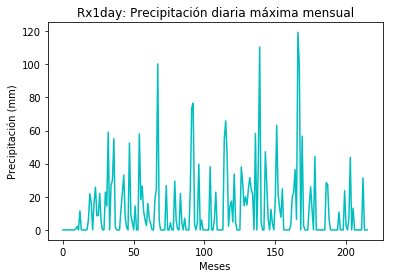

In [95]:
#Rx1day: Precipitación diaria máxima mensual
Rx1day = []
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    df_año = df[df['AÑO']==inicial]
    for j in range(1,13):
        df_mes = df_año[df_año['MES']==j]
        if(df_mes['PRECIP'].mean()!=0 and df_mes['PRECIP'].count()!=0):
            maxid = df_mes['PRECIP'].idxmax()
            maxim = df_mes['PRECIP'][maxid]
            Rx1day.append(maxim)
        else:  
            Rx1day.append(0.0)
            
    inicial=inicial+1
    
#10ma Gráfica: Rx1day
plt.plot(Rx1day, label = "Precipitación diaria máxima mensual", color = 'c')   
plt.xlabel("Meses")   
plt.ylabel("Precipitación (mm)")  
#plt.legend()
plt.title('Rx1day: Precipitación diaria máxima mensual')
plt.savefig('Rx1day', plt=2000)
plt.show()
    


In [44]:
Rx1day=pd.DataFrame(data=Rx1day)
Rx1day=Rx1day.fillna(0)
print(Rx1day)

      PRECIP  EVAP  TMAX  TMIN     FECHAN  MES   AÑO  TPROM  dif_T
0        0.0   0.0  28.0   0.0 1981-10-14   10  1981   0.00    0.0
1        0.0   7.3  26.0  14.0 1981-10-15   10  1981  20.00   12.0
2        0.0   7.6  28.0  12.5 1981-10-16   10  1981  20.25   15.5
3        0.0   8.1  28.0  10.0 1981-10-17   10  1981  19.00   18.0
4        0.0   1.2  30.5   9.5 1981-10-18   10  1981  20.00   21.0
5        0.0   4.2  32.0  12.5 1981-10-19   10  1981  22.25   19.5
6        0.5   6.7  32.0  14.5 1981-10-20   10  1981  23.25   17.5
7        0.0   8.2  31.0  18.0 1981-10-21   10  1981  24.50   13.0
8        0.0   6.9  32.0  15.0 1981-10-22   10  1981  23.50   17.0
9        0.0   2.7  35.5  14.5 1981-10-23   10  1981  25.00   21.0
10       0.0   6.4  33.0  16.0 1981-10-24   10  1981  24.50   17.0
11       0.0   7.3  30.5  14.0 1981-10-25   10  1981  22.25   16.5
12       0.0   5.6  32.0  12.5 1981-10-26   10  1981  22.25   19.5
13       0.0   5.9  34.0  12.5 1981-10-27   10  1981  23.25   

In [46]:
print("Hello motherfucker")

Hello motherfucker


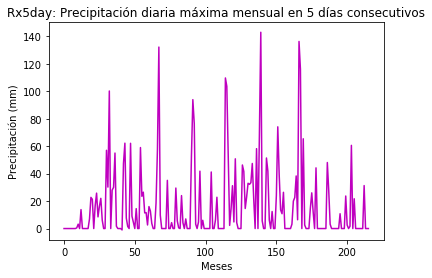

In [96]:
#Rx5day: Precipitación diaria máxima mensual en 5 días consecutivos.
Rx5day = []
fool = -1 #nombre sin relevancia

primer_año=df['AÑO'][0]
num_años=df['AÑO'].nunique()

for i in range(0,num_años):
    df_año = df[df['AÑO']==primer_año]
    for j in range(1,13):
        df_mes = df_año[df_año['MES']==j]
        df_mes = df_mes.reset_index()
        if(df_mes.PRECIP.count()!=0 and df_mes.PRECIP.mean()!=0):
            for k in range(4,len(df_mes)):
                lluvia = (df_mes["PRECIP"][k-4]+df_mes["PRECIP"][k-3]+
                         df_mes["PRECIP"][k-2]+df_mes["PRECIP"][k-1]+
                         df_mes["PRECIP"][k])
               
                if(lluvia>fool):
                    fool=lluvia
            
            Rx5day.append(fool)
            fool=-1
        else:
            Rx5day.append(0.0)
        
    primer_año=primer_año+1
    
#11va Gráfica: Rx5day
plt.plot(Rx5day, label = "Precipitación diaria máxima mensual en 5 días consecutivos", color = 'm')   
plt.xlabel("Meses")   
plt.ylabel("Precipitación (mm)")  
#plt.legend()
plt.title('Rx5day: Precipitación diaria máxima mensual en 5 días consecutivos')
plt.savefig('Rx5day', plt=2000)
plt.show()

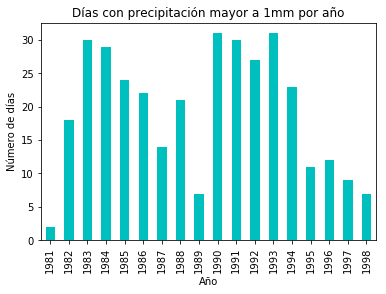

In [97]:
#SDII: Número de días en un año con precipitación mayor igual a 1mm
SDII=pd.DataFrame( df.loc[df['PRECIP'] >= 1 ] )
SDII=pd.DataFrame( SDII.groupby('AÑO').count() )
SDII_df = SDII.filter(['PRECIP'],axis=1)

SDII_df['dias_precip'] = SDII_df['PRECIP'] 
SDII_df = SDII_df.drop(['PRECIP'],1)             
SDII_df= SDII_df.reset_index()

#12va Gráfica: SDII
SDII_df.plot.bar(x='AÑO',y='dias_precip',color='c',legend=None) 
plt.title("Días con precipitación mayor a 1mm por año")       
plt.ylabel("Número de días")                                      
plt.xlabel("Año")                                               
plt.savefig('SDII',plt=2000)  

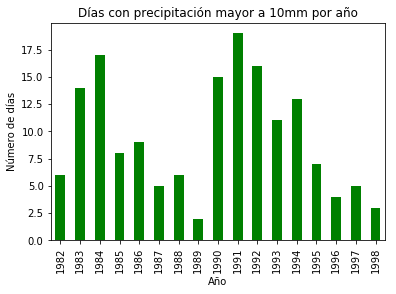

In [98]:
#R10mm: Número de días en el año con precipitación diaria mayor igual a 10 mm
R10mm=pd.DataFrame( df.loc[df['PRECIP'] >= 10 ] )
R10mm=pd.DataFrame( R10mm.groupby('AÑO').count() )


R10mm_df = R10mm.filter(['PRECIP'],axis=1)
R10mm_df['dias_precip_10'] = R10mm_df['PRECIP']
R10mm_df = R10mm_df.drop(['PRECIP'],1)
R10mm_df= R10mm_df.reset_index()

#13va Gráfica: R10mm
R10mm_df.plot.bar(x='AÑO',y='dias_precip_10',color='g',legend=None)
plt.title("Días con precipitación mayor a 10mm por año")      
plt.ylabel("Número de días")                                      
plt.xlabel("Año")                                               
plt.savefig('R10mm',plt=2000) 


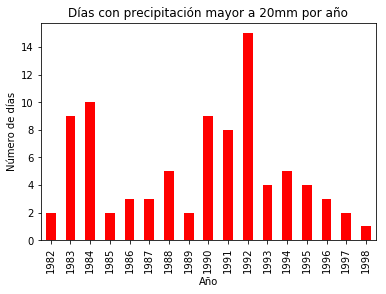

In [103]:
#R20mm: Número de días en el año con precipitación diaria mayor igual a 20mm
R20mm=pd.DataFrame( df.loc[df['PRECIP'] >= 20 ] )
R20mm=pd.DataFrame( R20mm.groupby('AÑO').count() )

R20mm_df = R20mm.filter(['PRECIP'],axis=1)
R20mm_df['dias_precip_20'] = R20mm_df['PRECIP']
R20mm_df = R20mm_df.drop(['PRECIP'],1)
R20mm_df= R20mm_df.reset_index()

#14va Gráfica: R20mm
R20mm_df.plot.bar(x='AÑO',y='dias_precip_20',color='r',legend=None)
plt.title("Días con precipitación mayor a 20mm por año")      
plt.ylabel("Número de días")                                      
plt.xlabel("Año")                                               
plt.savefig('R20mm',plt=2000) 

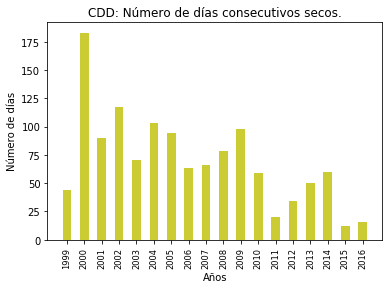

In [114]:
#CDD: Número de días consecutivos secos, sin precipitación o precipitación < 1mm
days = 0
CDD = []
CDD_año = []

inicial=df['AÑO'][0]
num_años=df['AÑO'].nunique()

for i in range(0,num_años):
    año_df = df[df['AÑO']==inicial]
    año_df = año_df.reset_index()
    for k in range(0,len(año_df)):
        if(año_df['PRECIP'][k]<1):
            days = days +1
        else:
            CDD_año.append(days)
            days=0
    CDD_max=max(CDD_año)
    CDD_año = []
    CDD.append(CDD_max)
    inicial=inicial+1
     
#15va Gráfica: CDD
AÑOS = [inicial+i for i in range(0, num_años)]
plt.bar(np.arange(len(X)), CDD,  width=0.5,align='center', alpha=0.8,color='y')
plt.xticks(np.arange(len(X)), AÑOS, size = 'small', color = 'k', rotation = 90)
plt.title('CDD: Número de días consecutivos secos.')
plt.xlabel('Años')
plt.ylabel('Número de días')
plt.savefig('CDD',plt=2000)
plt.show()

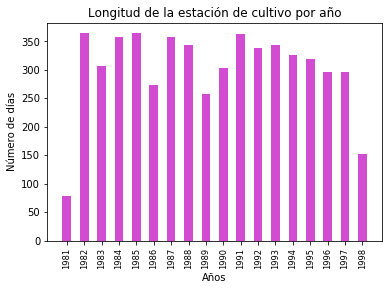

In [80]:
#Gráfica 4: GSL
inicial = df['AÑO'][0]
num_años = df['AÑO'].nunique()
AÑOS = [inicial + i for i in range(0, num_años)]


X = AÑOS
N = np.arange(len(X))
Y = GSL
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='m') #6B8E23
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.title('Longitud de la estación de cultivo por año')
plt.xlabel('Años')
plt.ylabel('Número de días')
plt.savefig('GSL',plt=2000)
plt.show()

In [104]:
print(":O")

:O


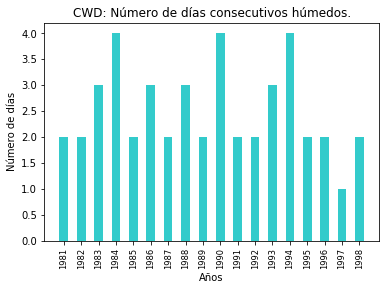

In [117]:
#CWD: Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm. 
days = 0
CWD = []
CWD_año = []

inicial=df['AÑO'][0]
for i in range(0,num_años):
    año_df = df[df['AÑO']==inicial]
    año_df = año_df.reset_index()
    for k in range(0,len(año_df)):
        if(año_df['PRECIP'][k]>=1):
            days = days +1
        else:
            CWD_año.append(days)
            days=0
    CWD_max=max(CWD_año)
    CWD_año = []
    CWD.append(CWD_max)
    inicial=inicial+1

#16va Gráfica: CWD
AÑOS = [df['AÑO'][0] + i for i in range(0, num_años)] 
plt.bar(np.arange(len(X)), CWD,  width=0.5,align='center', alpha=0.8,color='c')
plt.xticks(np.arange(len(X)), AÑOS, size = 'small', color = 'k', rotation = 90)
plt.title('CWD: Número de días consecutivos húmedos.')
plt.xlabel('Años')
plt.ylabel('Número de días')
plt.savefig('CWD',plt=2000)
plt.show()